In [5]:
train_file_path = r"D:\ML\MLOps_house_price_project\housing\artifact\data_ingestion\2025-02-24-01-13-00\ingested_data\train\housing.csv"

In [4]:
import pandas as pd

In [6]:
df = pd.read_csv(train_file_path)

In [7]:
df.shape

(16512, 10)

In [8]:
X,y =df.drop(columns=['median_house_value'],axis=1) ,df[['median_house_value']] 

In [9]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [10]:
X.shape

(16512, 9)

In [11]:
X.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
numerical_columns = X.drop(columns=['ocean_proximity'],axis=1)

In [14]:
numerical_columns.shape

(16512, 8)

In [15]:
simple_imputer = SimpleImputer(strategy='median')

In [16]:
simple_imputer.fit_transform(numerical_columns)

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [17]:
simple_imputer.n_features_in_

8

In [18]:
simple_imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [19]:
simple_imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [20]:
numerical_columns['longitude'].median()

np.float64(-118.51)

In [21]:
for i in numerical_columns.columns:
    print(numerical_columns[i].median())

-118.51
34.26
29.0
2119.0
433.0
1164.0
408.0
3.54155


In [22]:
X.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7277
INLAND        5262
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: count, dtype: int64

In [23]:
simple_imputer = SimpleImputer(strategy="most_frequent")

In [24]:
simple_imputer.fit_transform(df[['ocean_proximity']])

array([['INLAND'],
       ['NEAR OCEAN'],
       ['INLAND'],
       ...,
       ['<1H OCEAN'],
       ['<1H OCEAN'],
       ['INLAND']], dtype=object)

In [25]:
X['total_bedrooms']/X['total_rooms']

0        0.205784
1        0.160714
2        0.191595
3        0.276505
4        0.182692
           ...   
16507    0.184696
16508    0.179977
16509    0.234795
16510    0.183835
16511    0.205746
Length: 16512, dtype: float64

In [26]:
from sklearn.base import BaseEstimator,TransformerMixin

In [27]:
# SimpleImputer(strategy="median")
class Test(BaseEstimator,TransformerMixin):
    def __init__(self,strategy="median"):
        self.strategy=strategy

    def fit(self,x):
        self.features_ = x.columns
        self.statistic_=[]
        for column in x.columns:
            self.statistic_.append(x[column].median())
        return self
    def transform(self,x:pd.DataFrame):
        #self.fit(x)
        for idx,column in enumerate(x.columns):
            #x[column] = 
            x[column].fillna(self.statistic_[idx])
        #return x[column]
    def fit_transform(self,x):
        self.fit(x)
        self.transform(x)

In [33]:
test = Test()

In [31]:
numerical_columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [41]:
test = Test().fit(numerical_columns)
test.statistic_

[np.float64(-118.51),
 np.float64(34.26),
 np.float64(29.0),
 np.float64(2119.0),
 np.float64(433.0),
 np.float64(1164.0),
 np.float64(408.0),
 np.float64(3.54155)]

In [34]:
test.fit_transform(numerical_columns)

In [35]:
test.statistic_

[np.float64(-118.51),
 np.float64(34.26),
 np.float64(29.0),
 np.float64(2119.0),
 np.float64(433.0),
 np.float64(1164.0),
 np.float64(408.0),
 np.float64(3.54155)]

In [36]:
test.fit_transform(numerical_columns)

In [ ]:
test = Test().fit_transform(numerical_columns)

In [42]:
COLUMN_TOTAL_ROOMS = "total_rooms"
COLUMN_POPULATION = "population"
COLUMN_HOUSEHOLDS = "households"
COLUMN_TOTAL_BEDROOM = "total_bedrooms"
DATASET_SCHEMA_COLUMNS_KEY=  "columns"

NUMERICAL_COLUMN_KEY="numerical_columns"
CATEGORICAL_COLUMN_KEY = "categorical_columns"

TARGET_COLUMN_KEY="target_column"

                  #  ('feature_genrator',FeatureGenerator())
class FeatureGenerator(BaseEstimator, TransformerMixin):

    def __init__(self, add_bedrooms_per_room=True,
                 total_rooms_ix=3,
                 population_ix=5,
                 households_ix=6,
                 total_bedrooms_ix=4, 
                 columns=None):
        """
        FeatureGenerator Initialization
        add_bedrooms_per_room: bool
        total_rooms_ix: int index number of total rooms columns
        population_ix: int index number of total population columns
        households_ix: int index number of  households columns
        total_bedrooms_ix: int index number of bedrooms columns
        """
        try:
            self.columns = columns
            if self.columns is not None:
                total_rooms_ix = self.columns.index(COLUMN_TOTAL_ROOMS)
                population_ix = self.columns.index(COLUMN_POPULATION)
                households_ix = self.columns.index(COLUMN_HOUSEHOLDS)
                total_bedrooms_ix = self.columns.index(COLUMN_TOTAL_BEDROOM)

            self.add_bedrooms_per_room = add_bedrooms_per_room
            self.total_rooms_ix = total_rooms_ix
            self.population_ix = population_ix
            self.households_ix = households_ix
            self.total_bedrooms_ix = total_bedrooms_ix
        except Exception as e:
            raise  e

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        try:
            room_per_household = X[:, self.total_rooms_ix] / \
                                 X[:, self.households_ix]
            population_per_household = X[:, self.population_ix] / \
                                       X[:, self.households_ix]
            if self.add_bedrooms_per_room:
                bedrooms_per_room = X[:, self.total_bedrooms_ix] / \
                                    X[:, self.total_rooms_ix]
                generated_feature = np.c_[
                    X, room_per_household, population_per_household, bedrooms_per_room]
            else:
                generated_feature = np.c_[
                    X, room_per_household, population_per_household]

            return generated_feature
        except Exception as e:
            raise  e

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# we can create sapearate pipeline for the "numerical column" and
# "catogorical column"  at final stage we combine these numerical and
# categorical columns so we use ColumnTransformer

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
# Numerical Pipeline

num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('feature_genrator',FeatureGenerator()),
    ('scaling',StandardScaler())
])

In [46]:
from sklearn.preprocessing import OneHotEncoder

In [47]:
# Categorical pipeline
cat_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('OneHotEncoder',OneHotEncoder()),
    ('scaling',StandardScaler(with_mean=False))
])


In [ ]:
df = pd.read_csv(train_file_path) # train_file_path
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [50]:
numerical_columns = ['longitude', 'latitude', 'housing_median_age','total_rooms',
                     'total_bedrooms', 'population','households', 'median_income']

categorical_columns = ['ocean_proximity']

In [51]:
preprocessing = ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_columns),
    ('cat_pipeline',cat_pipeline,categorical_columns)])

In [52]:
preprocessing

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('feature_genrator',
                                                  FeatureGenerator()),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder()),
                                                 ('scaling',
                                                  StandardScaler(with_mean=False))]),
                                 ['ocean_proximity'])])

In [54]:
import numpy as np

In [57]:
train_df = preprocessing.fit_transform(df)
train_df


array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  2.9869105 ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [58]:
preprocessing.n_features_in_

10

In [59]:
preprocessing.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'], dtype=object)

In [60]:
preprocessing.named_transformers_

{'num_pipeline': Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                 ('feature_genrator', FeatureGenerator()),
                 ('scaling', StandardScaler())]),
 'cat_pipeline': Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                 ('OneHotEncoder', OneHotEncoder()),
                 ('scaling', StandardScaler(with_mean=False))]),
 'remainder': 'drop'}

In [61]:
test_file_path = r"D:\ML\MLOps_house_price_project\housing\artifact\data_ingestion\2025-02-24-01-13-00\ingested_data\test\housing.csv"

In [63]:
import pandas as pd
test_df = pd.read_csv(test_file_path)
test_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
1,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
2,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
3,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
4,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
4123,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN
4124,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN
4125,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN
4126,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN


In [64]:
test_arr = preprocessing.transform(test_df)
test_arr

array([[ 0.59229422, -0.71065803,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [-0.42180959, -0.35049119, -0.37006852, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.56232071, -0.64985064,  0.5842485 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.07211862, -0.56097831,  1.14093342, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83208232, -0.93985512,  0.10708999, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.50736927, -0.67791559,  0.5842485 , ...,  0.        ,
         0.        ,  0.        ]])

In [65]:
test_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [66]:
train_df.shape

(16512, 16)

In [67]:
test_df.shape

(4128, 10)

In [68]:
x = train_df
x

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  2.9869105 ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [69]:
y =np.array(df['median_house_value'])
y

array([ 72100., 279600.,  82700., ..., 140400., 258100.,  62700.])

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lr = LinearRegression()


In [72]:
lr.fit(x,y)

LinearRegression()

In [73]:
lr.fit_intercept

True

In [74]:
# weight for every columns 
# cofficient
lr.coef_

array([-55649.63398453, -56711.59742892,  13734.72084192,  -1943.05586355,
         7343.22979731, -45709.28253579,  45453.26277662,  74714.15226133,
         6604.58396628,   1043.0545298 ,   9248.31607777,   5976.05417381,
       -11724.43003685,   1545.21739358,   2385.4859833 ,   5159.35726253])

In [75]:
# intercept value
lr.intercept_

np.float64(206873.03694026492)

In [76]:
# to get predicted features values (points)
y_hat = lr.predict(x)
y_hat

array([ 85657.90192014, 305492.60737488, 152056.46122456, ...,
       220683.15054463, 238863.55319782,  98197.80203821])

In [77]:
len(y_hat)

16512

In [78]:
import matplotlib.pyplot as plt

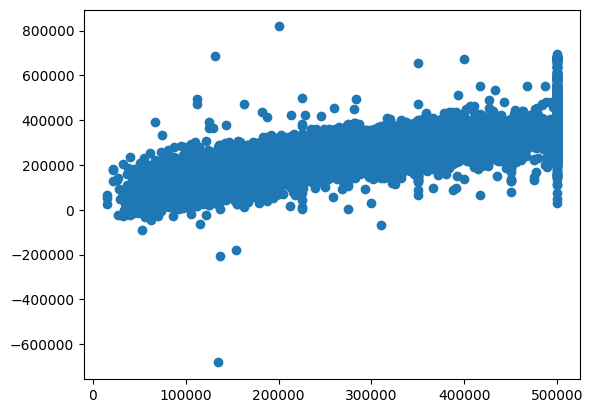

In [81]:
plt.plot(y,y_hat,"o")

In [82]:
from sklearn.metrics import r2_score

In [83]:
r2_score(y,y_hat)

0.6481553634454353

In [84]:
test_arr

array([[ 0.59229422, -0.71065803,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [-0.42180959, -0.35049119, -0.37006852, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.56232071, -0.64985064,  0.5842485 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.07211862, -0.56097831,  1.14093342, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83208232, -0.93985512,  0.10708999, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.50736927, -0.67791559,  0.5842485 , ...,  0.        ,
         0.        ,  0.        ]])

In [85]:
yhat_test = lr.predict(test_arr)

In [87]:
test_df.median_house_value

0       500001.0
1       162500.0
2       204600.0
3       159700.0
4       184000.0
          ...   
4123    110000.0
4124    118800.0
4125    293800.0
4126    335700.0
4127    215600.0
Name: median_house_value, Length: 4128, dtype: float64

In [91]:
y_test = np.array(test_df.median_house_value)
y_test

array([500001., 162500., 204600., ..., 293800., 335700., 215600.])

In [92]:
r2_score(y_test,yhat_test)

0.656459976479592